<a href="https://colab.research.google.com/github/jw-lambert-huang/mnist-classification/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [5]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
# rescale
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [7]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

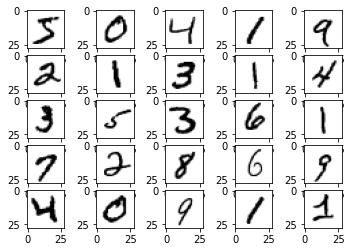

In [8]:
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.imshow(x_train[i], cmap='binary')

In [9]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(28,28)))
# I found that it comes to an error if I change the parameter 10 here, why?
model.add(tf.keras.layers.Dense(10, activation='softmax')) # 10 classes, so cannot change

In [10]:
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

In [11]:
history = model.fit(
    x_train,
    y_train_onehot,
    validation_split=0.2,
    epochs=20
    )

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0885 - accuracy: 0.1823 - val_loss: 0.0857 - val_accuracy: 0.2918
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0821 - accuracy: 0.3838 - val_loss: 0.0777 - val_accuracy: 0.5073
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0726 - accuracy: 0.5673 - val_loss: 0.0657 - val_accuracy: 0.6322
Epoch 4/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0598 - accuracy: 0.6451 - val_loss: 0.0524 - val_accuracy: 0.6888
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0485 - accuracy: 0.7054 - val_loss: 0.0423 - val_accuracy: 0.7548
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0398 - accuracy: 0.7805 - val_loss: 0.0345 - val_accuracy: 0.8266
Epoch 7/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0333 - accuracy: 0.8270 - val_loss: 0.0290 - val_accuracy:

In [12]:
model.evaluate(x_test, y_test_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 0.0148 - accuracy: 0.9094


[0.01481962762773037, 0.9093999862670898]

[[6.9954246e-04 2.5590922e-04 1.7496485e-04 5.6555755e-03 8.2474101e-01
  4.9335439e-02 1.8346420e-03 1.5816038e-02 4.4302441e-02 5.7184510e-02]]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


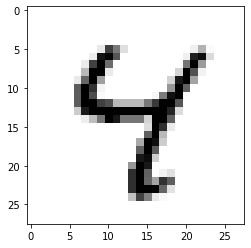

In [30]:
plt.imshow(x_test[6], cmap='binary')
print(model.predict(x_test[6:7]))
print(y_test_onehot[6])


# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')